# PHYS 325 Scientific Computing -- Fall 2018

## 2.2 Non-linear equations

Good references: *"Computational Physics"* by Mark Newman, *"Numerical Recipes"*

So far we have covered: linear equations

What about general non-linear equations?

- many equations in physics are non-linear
- solving non-linear equations is in general much harder than solving linear equations
- systems of many non-linear equations are even harder
- it is hard to tell whether and how many solutions exist

=> will mostly focus on single-variable equations

### 2.2.1 Relaxation method (fixed point iteration)

**Example** (no analytic solution):

$$x = 2 - e^{-x}$$

**Visualization**:

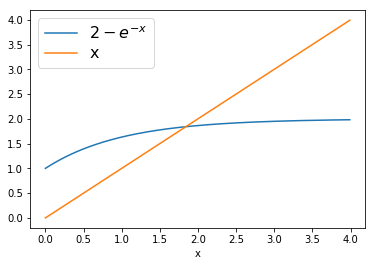

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# generate fine list of numbers for plotting
x = np.arange(0.0, 4.0, 0.01)

# plot the right hand side of the equation
plt.plot(x, 2 - np.exp(-x), label=r'$2-e^{-x}$')

# plot the left hand side of the equation
plt.plot(x, x, label='x')

# make a nice axis label and legend
plt.xlabel("x")
plt.legend(loc='upper left', fontsize=16, labelspacing=0.3)

# this displays all components of the plot
plt.show()

**Idea**: guess a solution and iterate

$$
\begin{array}{lll}
x_0 &=& 1.0 \\
x_1 &=& 2 - e^{-x_0} \approx 1.632\\
x_2 &=& 2 - e^{-x_1} \approx 1.804\\
\vdots &\ & 
\end{array}
$$

until the value stops changing (**fixed point**)

In [1]:
from math import exp

x = 1.0

for k in range(10):
    x = 2 - exp(-x)
    print(x)

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


We have indeed found a fixed point!

value stops changing => this solution is definitely correct

Try a "bad" initial value

In [2]:
from math import exp

x = 100.0

for k in range(10):
    x = 2 - exp(-x)
    print(x)

2.0
1.8646647167633872
1.8450518473052135
1.8419828720850022
1.8414971765224537
1.8414201737059899
1.8414079621425745
1.8414060254740223
1.8414057183297619
1.8414056696184309


This worked, too!

Have we found all solutions?

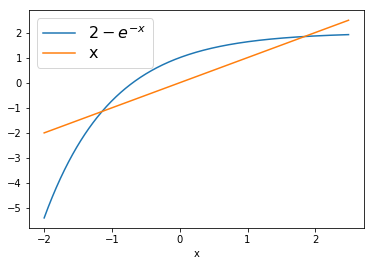

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2.0, 2.5, 0.01)

plt.plot(x, 2 - np.exp(-x), label=r'$2-e^{-x}$')
plt.plot(x, x, label='x')
plt.xlabel("x")
plt.legend(loc='upper left', fontsize=16, labelspacing=0.3)

plt.show()

In [4]:
from math import exp

x = -1.0

for k in range(10):
    x = 2 - exp(-x)
    print(x)

-0.7182818284590451
-0.0509063726925012
0.947775628263688
1.612397763269514
1.800591094959094
1.834798790246516
1.8403543792073163
1.8412388455153157
1.8413792023278908
1.8414014642751155


In [5]:
from math import exp

x = -2.0

for k in range(10):
    x = 2 - exp(-x)
    print(x)

-5.38905609893065
-216.99657686275216
-1.7394659160525732e+94


OverflowError: math range error

Fixed point implies correct solution, but

- solution found depends on starting value
- might not find all solutions
- might not find any solution

Example with trivial solution $x=1$ of:

$$x = e^{1-x^2}$$

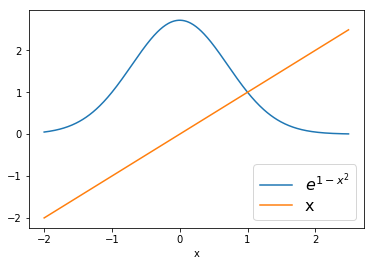

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2.0, 2.5, 0.01)

plt.plot(x, np.exp(1-x*x), label=r'$e^{1-x^2}$')
plt.plot(x, x, label='x')
plt.xlabel("x")
plt.legend(loc='lower right', fontsize=16, labelspacing=0.3)

plt.show()

In [ ]:
from math import exp

x = 1.1

for k in range(10):
    x = exp(1-x*x)
    print(x)

=> oscillates forever between 2 values

**Useful trick**: rearrange equation

$$x = e^{1-x^2} \Rightarrow \log(x) = 1-x^2 \Rightarrow x = \sqrt{1-\log(x)}$$

In [ ]:
from math import sqrt, log

x = 1.1

for k in range(10):
    x = sqrt(1-log(x))
    print(x)

A little bit of theory on fixed point **convergence**:

Assume $x^*$ is the solution (fixed point) of $x = f(x)$. Then we can Taylor expand close to $x^*$:

$$
\begin{array}{lll}
{x}_{n+1} = f(x_n) &=& f(x^*) + (x_n-x^*)f'(x^*)+\ldots\\
 &=& x^* + (x_n-x^*)f'(x^*)+\ldots
\end{array}
$$

Neglecting higher order terms:

$${x}_{n+1} - x^* = (x_n-x^*)f'(x^*)$$

This means that the distance $x-x^*$ to the true solution gets multiplied on each iteration by a factor of $f'(x^*)$

- $|f'(x^*)|<1$: distance will get smaller => convergence
- $|f'(x^*)|>1$: distance will get larger => no convergence

Consider:

- $f(x)=2-e^{-x}\Rightarrow f'(x) = e^{-x}$
    - if $x<0$ then $f'(x)$ is always larger than 1
    - if $x>0$ then $f'(x)$ is always smaller than 1
- $f(x)=e^{1-x^2}\Rightarrow |f'(x)| = |-2xe^{1-x^2}|$
    - at $x=1$ this equals $2>1$

In such cases: invert the function!

=> $(f^{-1})'(x^*) = 1/f'(x^*)$

But:
- not all equations can be inverted
- other rearrangements of the equation do not guarantee convergence

Advantages of the method:
- easy to code
- works in many cases
- extends easily to more than one variable

Not all equations are in the form

$$ x = f(x) $$

(although usually you can rearrange them to this form)

Can write any equation as 

$$f(x)=0$$

=> **root finding** (1d)

All (non-linear) root finding algorithms:

- work with some form of iteration
- start from some trial solution
- improve the solution until a convergence criterion is reached

Smooth functions:

- "good" algorithms will always converge if initial guess is good enough
- rate of convergence is usually known

Common problems:

- your program converges, with ten-digit accuracy, to the wrong root of a problem
- your program fails to converge because there is actually no root
- there is a root but your initial estimate was not sufficiently close to find it

Always try to get some idea of what your function looks like before trying to find
its roots!

Always bracket a root before trying to converge to the root's value:

### 2.2.2 Bracketing

root is bracketed in interval $(a,b)$ if $f(a)$ and $f(b)$ have opposite signs

![bracketing](images/bracketing.png)

intermediate value theorem for continuous functions => at least one root must be in the interval!

But there are numerical difficulties and pathological functions:

![different bracketing cases](images/roots.png)
Image from: *"Numerical Recipes in C"* Chapter 9

(a) isolated root $x_1$ bracketed by two points $a$ and $b$

(b) there is not necessarily a sign change in the function near a double root

(c) pathological function with many roots

(d) the function has opposite signs at points $a$ and $b$, but the points bracket a singularity, not a root

Assume we know that an interval contains a root

=> refine the root

Many procedures available

speed <=> reliability

Usually cannot have both...

### 2.2.3 Bisection Method

After initial bracketing:

![bisection](images/bisection.png)

- evaluate the function in the middle of the bracket interval
- use the midpoint to replace whichever limit has the same sign
- interval gets **exactly halved** after each iteration (=> error is exactly halved)
- repeat until you have narrowed the interval to desired accuracy

Number of steps $N$ until desired accuracy $\varepsilon$:

$$N = \log_2\frac{|a-b|}{\varepsilon}$$

Example:
- want accuracy $\varepsilon=10^{-10}$
- initial distance between points: $|a-b|=10^{10}$

In [ ]:
import math

math.log(1e10/1e-10,2)

Bisection method:
- simple idea
- cannot fail (provided there is a bracketed root...)
- does not extend to more than one variable/equation
- slower than other methods

Consider our initial example:

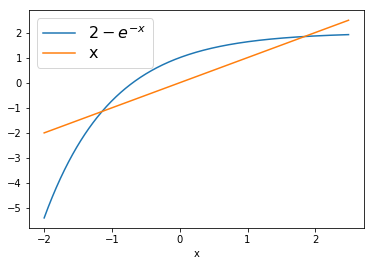

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2.0, 2.5, 0.01)

plt.plot(x, 2 - np.exp(-x), label=r'$2-e^{-x}$')
plt.plot(x, x, label='x')
plt.xlabel("x")
plt.legend(loc='upper left', fontsize=16, labelspacing=0.3)

plt.show()

In [2]:
from numpy import exp, sign

def f(x):
    return 2 - exp(-x) - x

a = -2
b = 0
counter = 0
accuracy = 1e-10

if( sign(f(a)) != sign(f(b)) ):
    while(abs(a-b) > accuracy):
        counter += 1
        midpoint = (a+b)/2
        if( sign(f(midpoint)) == sign(f(a)) ):
            a = midpoint
        else:
            b = midpoint
            
print("Bisection converged to ", (a+b)/2, " after ", counter, " iterations")

Bisection converged to  -1.146193220600253  after  35  iterations


### 2.2.4 Newton's method

(also called Newton-Raphson method)

![Newton's method](images/newton.png)

**Idea**: Taylor expansion around the root

$$f(x+\delta) = 0 = f(x) + f'(x)\delta + \mathcal{O}(\delta^2)$$

For small $\delta$:

$$\delta\approx-\frac{f(x)}{f'(x)}$$

- faster than relaxation and bisection methods
- can be generalized to many variables
- usually finds root nearest to starting point (great method to refine roots)
<br><br>
- need to know the function's derivative
- numerical derivatives possible, but reduce efficiency and may lead to roundoff errors
<br><br>
- problems near extrema (derivative zero)
- might enter an infinite cycle
- poor global convergence, but can be combined with bisection

In [ ]:
from numpy import exp, sign

def f(x):
    return 2 - exp(-x) - x

def deriv(x):
    return exp(-x) - 1

x = -2
compare_x = 1000
counter = 0
accuracy = 1e-10

while(abs(x-compare_x) > accuracy):
    counter += 1
    compare_x = x
    x = x - f(x)/deriv(x)
            
print("Newton's method converged to ", x, " after ", counter, " iterations")

Newton's method converges *quadratically* rather than linearly:

$$
\begin{array}{lll}
f(x^*) = & 0 &= f(x_n) + (x^*-x_n)f'(x_n) +(x^*-x_n)^2 \frac{f''(x_n)}{2} + \ldots\\
\Rightarrow & 0 &= \frac{f(x_n)}{f'(x_n)}+ (x^*-x_n)+\frac{1}{2}(x^*-x_n)^2 \frac{f''(x_n)}{f'(x_n)}
\end{array}
$$

With the Newton formula

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

we get

$$
0 = \underbrace{(x^*-x_{n+1})}_{-\varepsilon_{n+1}} \ +\frac{1}{2}\ \underbrace{(x^*-x_n)^2}_{\varepsilon_n^2}\ \frac{f''(x_n)}{f'(x_n)}
$$

$$
\Rightarrow \varepsilon_{n+1} \propto \varepsilon_n^2
$$

Near a root, the number of significant digits approximately **doubles**

### 2.2.5 Choice of method

More methods (explained nicely in "Numerical Recipes"):

- [secant method](https://en.wikipedia.org/wiki/Secant_method): like Newton's method but with differences instead of derivatives
- [Broyden's method](https://en.wikipedia.org/wiki/Broyden%27s_method): generalization of the secant method to more than one dimension
- [false position (or regula falsi)](https://en.wikipedia.org/wiki/False_position_method): combination of bisection and secant method
- [Ridder's method](https://en.wikipedia.org/wiki/Ridders%27_method): powerful variant of false position
- [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method): combination of the bisection method, the secant method and inverse quadratic interpolation
- [Laguerre's method](https://en.wikipedia.org/wiki/Laguerre%27s_method): taylored to polynomials

Which method to choose? (according to "Numerical Recipes")

- When you cannot easily compute the derivative:
     - Brent's algorithm: method of choice to find a bracketed root of a general 1d function
     - Ridder's method is a close competitor
- When you can compute the derivative: 
     - after bracketing, combine Newton's method with bisection or similar
- Roots of polynomials:
     - beware that some polynomials are ill-conditioned! (small coefficient changes => large effects)
     - Laguerre's method is recommended as a starting point
- Multidimensional problems: 
     - the only elementary method is Newton, which works very well if you can supply a good first guess of the solution 
     - if Newton's method fails: there are more advanced and complicated, but globally more convergent, alternatives
     - more dimensions are harder because we cannot "trap" the solution (it can escape via other dimensions)

### 2.2.6 Higher dimensions

Example in 2d: $f(x,y) = g(x,y) = 0$

![Nonlinear multidimensional systems](images/nonlinear_multidim_color.png)

Image adapted from *"Numerical Recipes in C"*

If the two functions $f$ and $g$ are unrelated to each other, so are their "contour lines" $f=0$ and $g=0$

=> we need to map out the full zero contour lines in order to find all common roots

This becomes much harder the more dimensions we have!

#### Newton's method for more than one variable

Several equations for several variables:

$$
\left.\begin{array}{lll}
f_1(x_1,\ldots x_N) &=& 0\\
 & \vdots & \\
f_N(x_1,\ldots x_N) &=& 0
\end{array}\right\}
\mathbf{f}(\mathbf{x}) = 0
$$

Taylor expand around root $\mathbf{x}^*\equiv (x^*_1,\ldots,x^*_N)$:

$$
0 = \mathbf{f}(\mathbf{x}^*) = \mathbf{f}(\mathbf{x}) + \nabla\mathbf{f}\cdot(\mathbf{x}^*-\mathbf{x})+\ldots,
$$

where

$$
\nabla\mathbf{f} = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \ldots & \frac{\partial f_1}{\partial x_N}\\
\vdots & & \vdots \\
\frac{\partial f_N}{\partial x_1} & \ldots & \frac{\partial f_N}{\partial x_N}
\end{pmatrix}
$$

This is also called the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) (in this case evaluated at $\mathbf{x}^*$)

This is just a set of linear equations for $\Delta\mathbf{x}\equiv \mathbf{x}-\mathbf{x}^*$:

$$
\nabla\mathbf{f}\cdot\Delta\mathbf{x} = \mathbf{f}(\mathbf{x})
$$

Algorithm:
- choose starting point vector $\mathbf{x}$
- calculate $\mathbf{f}$ and $\nabla\mathbf{f}$ at this vector
- solve linear system (see previous lectures) for $\Delta\mathbf{x}$
- update vector $\mathbf{x}'=\mathbf{x}-\Delta\mathbf{x}$
- repeat until desired accuracy

### 2.2.7 SciPy [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) library

In [ ]:
import scipy as sp
import scipy.optimize as opt

def f(x):
    return 2 - sp.exp(-x) - x

f0 = opt.bisect(f, -2, 0)           # starting interval [-2,0]
f1 = opt.newton(f, -2)              # starting point -2

print(f0)
print(f1)

In [ ]:
f0 = opt.bisect(f, -2, 2)           # must bracket root for bisection

In [ ]:
import numpy as np
from scipy.optimize import root

def f(x):
    fun = [ x[0] * np.cos(x[1]) -4, x[0] * x[1] - x[1] - 5]
    return fun

x0 = np.array([1.,1.])

res = root(f, x0, method='broyden1')    # Broyden method in 2d
print(res)

### 2.2.8 Function optimization

(finding the minimum/maximum of a function)

In physics we often need minimization, for instance:

- equilibrium problems (potential energy minimum)
- quantum mechanical ground state (energy minimum)
- minimization of the action, Fermat's principle
- data fitting (linear least-squares)

Minima | $\leftrightarrow$ | Maxima
-------|-------------------|----------
$f(x)$ | $\leftrightarrow$ | $-f(x)$

Relation to root finding:

$$
\frac{df}{dx} = 0
$$

But minimization problems are in general simpler:

- might need the minimum of $f(x_1,\ldots,x_N)$ with respect to several variables
- but no analog to simultaneous equations in many variables

There can be many maxima and minima:

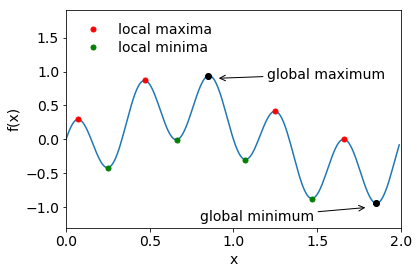

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def f(x):
    return np.cos(2*np.pi*(x+0.1))*np.sin(3*np.pi*x)

x = np.arange(0.0, 2.0, 0.01)
y = f(x)

localMaxima = argrelextrema(y, np.greater)[0]
localMinima = argrelextrema(y, np.less)[0]

plt.rcParams.update({'font.size': 14})

plt.plot(x, y)
plt.plot(x[localMaxima], f(x[localMaxima]), 'r.', markersize=10, label='local maxima')
plt.plot(x[localMinima], f(x[localMinima]), 'g.', markersize=10, label='local minima')
plt.plot(x[localMaxima[2]], f(x[localMaxima[2]]), 'k.', markersize=12)
plt.plot(x[localMinima[4]], f(x[localMinima[4]]), 'k.', markersize=12)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='upper left', frameon=False, labelspacing=0.3)

plt.annotate('global maximum', xy=(0.9, 0.9), xytext=(1.2, 0.9),
             arrowprops=dict(arrowstyle="->"),
             )

plt.annotate('global minimum', xy=(1.8, -1.0), xytext=(0.8, -1.2),
             arrowprops=dict(arrowstyle="->"),
             )

plt.xlim(0, 2)
plt.ylim(-1.3, 1.9)
plt.show()

- there may be several global maxima/minima (but usually just one)
- often interested in global minimum, e.g. ground state
- local minima also interesting, e.g. metastable equilibrium
- most methods are good at finding extrema, but cannot distinguish between local and global ones

**Golden section search**

- similar to bisection for root finding
- minimum is bracketet by **three** points: function at center point is lower than at the two outside points
- we then choose another point inside the interval and update one of the two outside points

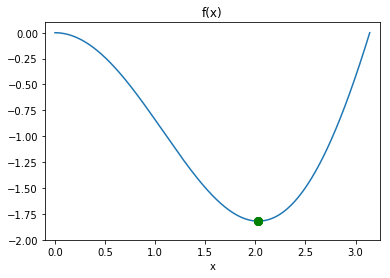

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from scipy.constants import golden

def f(x):
    return -np.sin(x)*x

x = np.linspace(0, np.pi, 1000)

a, b, c = 0.0, (golden - 1.0)*np.pi, np.pi
dummy = 1000

fig = plt.figure()
ax = plt.axes(xlim=(-0.1, np.pi + 0.1), ylim=(-2.0,0.1))

line, = ax.plot(x, f(x))
points, = ax.plot([a, b, c], [f(a), f(b), f(c)], 'g.', markersize=16)
nextpoint, = ax.plot(dummy , dummy, 'k.', markersize=16)

plt.xlabel('x')
plt.title('f(x)')

def animate(i):
    global a, b, c, d
    
    line.set_data(x, f(x))
    points.set_data([a,b,c], f([a,b,c]))
    
    if i%2==1:
        if (b-a) > (c-b):
            d = a + (golden - 1.0)*(b-a)
            if f(d) > f(b):
                a = d
            else:
                c = b
                b = d
        else:
            d = c - (golden - 1.0)*(c-b)
            if f(d) > f(b):
                c = d
            else:
                a = b
                b = d
        nextpoint.set_data(d, f(d))
    else:
        nextpoint.set_data(dummy, dummy)

    return line, points, nextpoint,

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40)

from IPython.display import HTML
HTML(ani.to_jshtml())

How to choose the new point?

- we want the two inner points to be the same distance from their corresponding outer points 
- each new point should divide the interval according to the same ratio (scale similarity)

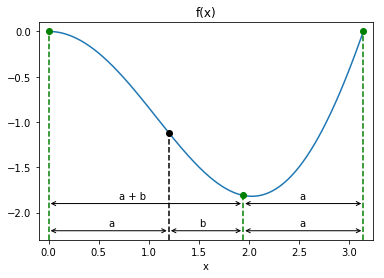

In [5]:
a, b, c = 0.0, (golden - 1.0)*np.pi, np.pi
d = a + (golden - 1.0)*(b-a)

fig = plt.figure()
ax = plt.axes(xlim=(-0.1, np.pi + 0.1), ylim=(-2.3,0.1))
ax.plot(x, f(x))

plt.xlabel('x')
plt.title('f(x)')

(markerline, stemlines, baseline) = plt.stem([a, b, c], [f(a), f(b), f(c)], 
                                             'g--', markerfmt='go', bottom = -2.3)
plt.stem([d], [f(d)], 'k--', markerfmt='ko', bottom = -2.3)
plt.setp(baseline, visible=False)
    
plt.annotate('', xy=(d, -2.2), xytext=(b, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(c, -2.2), xytext=(b, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(a, -2.2), xytext=(d, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(c, -1.9), xytext=(b, -1.9), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(a, -1.9), xytext=(b, -1.9), arrowprops=dict(arrowstyle="<->"),)
plt.text(1.5,-2.15,'b')
plt.text(2.5,-2.15,'a')
plt.text(0.7,-1.85,'a + b')
plt.text(2.5,-1.85,'a')
plt.text(0.6,-2.15,'a')
    
plt.show()

$$\Rightarrow \frac{a+b}{a}=\frac{a}{b}\equiv\varphi=1.6180339887\ldots$$

This is the [**Golden Ratio**](https://en.wikipedia.org/wiki/Golden_ratio)

In [6]:
import numpy as np
from scipy.optimize import golden
import scipy.constants as spc
    
a, b, c = 0.0, (spc.golden - 1.0)*np.pi, np.pi
    
golden(f, brack=(a,b,c))

2.0287578271802458

In [7]:
from scipy.optimize import minimize_scalar

minimize_scalar(f, bracket=(a,b,c), method='Golden')

     fun: -1.819705741159653
    nfev: 42
     nit: 37
 success: True
       x: 2.0287578271802458

In [8]:
from scipy.optimize import minimize_scalar

minimize_scalar(f, bounds=(a,b,c), method='Brent')

     fun: -1.819705741159653
    nfev: 15
     nit: 10
 success: True
       x: 2.028757837653707

Finding a **global** extremum is, in general, very difficult!

Strategies:

(i) find many local extrema starting from widely varying starting values (perhaps chosen randomly), and then pick the most extreme of these

(ii) perturb a local extremum by taking a finite step away from it, and then see if your routine returns you to a better point, or "always" to the same one

(iii) simulated annealing methods => later in the lecture

**Multidimensional optimization**    

- steepest descent (gradient descent)

  Idea: follow the functions steepest slope down (for minimum) or up (for maximum)

  Gradient of a function

  $$
  \nabla f = \begin{pmatrix}
  \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_N}
  \end{pmatrix}
  $$

  points in the direction of the steepest slope!

    - take step size proportional to length of the gradient vector
    - each new step direction is orthogonal to the previous one (conjugate directions) => must make $90^\circ$ turn
    - typically (slow) zig-zag approach towards extremum
    - finds local extrema

- conjugate gradient method
    - similar to steepest descent, but faster
    - determines set of conjugate directions beforehand to avoid zig-zag
    - exactly one step in each direction

  <img src="images/Conjugate_gradient.png" alt="Conjugate gradient vs steepest descent" style="width: 280px;"/>

  <div style="text-align: right">Image from <a href="https://en.wikipedia.org/wiki/Conjugate_gradient_method">Wikipedia</a></div>
    
- Newton's method

- [Nelder-Mead Downhill Simplex Method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method): geometric method, don't need to know derivatives